# Presentation plots

- **Purpose**: The purpose of this notebook is to generate the plots that were presented in the RICHAI final project presentation to the MDS faculty and cohort.
- **Author**: Nico Van den Hooff

In [1]:
cd ../

/home/nico/richai


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.plotting import plot_efficiencies, plot_cm, wrangle_predictions, plot_roc_curves

# Read in model results

In [3]:
# where all model results are saved
base_path = "/fast_scratch_1/capstone_2022/models/"

# paths results
pointnet_path = os.path.join(
    base_path,
    "pointnet/saved_models/pointnet_momentum_radius_delta_0.5_16e_0706_unbalanced_p_15_45.csv"
)

dgcnn_path = os.path.join(base_path, "dgcnn/dgcnn_predictions.csv")
xgboost_path = os.path.join(base_path, "xgboost/saved_models/xgb_balanced.csv")

In [4]:
# dgcnn and xgboost are already OK for momentum values
pointnet_results = pd.read_csv(pointnet_path)
dgcnn_results = pd.read_csv(dgcnn_path) 
xgboost_results = pd.read_csv(xgboost_path)

In [5]:
pointnet_results.head()

,Unnamed: 0,labels,predictions,momentum,probabilities
0,0,0,0,21.731115,0.000906
1,1,0,0,44.135597,0.220066
2,2,0,0,38.678699,0.266195
3,3,0,0,30.634066,0.000082
4,4,0,0,43.756943,0.001173


In [6]:
dgcnn_results.head()

,labels,predictions,probabilities,momentum
0,0,0,0.448708,40.411877
1,0,0,0.305368,36.388615
2,0,1,0.799871,43.925625
3,0,1,0.873892,44.558716
4,0,0,0.078490,37.652380


In [7]:
xgboost_results.head()

,Unnamed: 0,labels,predictions,probabilities,momentum
0,74161,0,0,0.001645,24.321434
1,107861,0,0,0.002966,20.784155
2,51081,0,0,0.001681,22.166454
3,25856,0,0,0.220906,24.523874
4,66792,0,0,0.000125,18.591120


# ROC Curves: PointNet and DGCNN

In [8]:
best_pointnet_models = {
    "Hits, momentum and radius, delta = 0.50": os.path.join(
        base_path,
        "pointnet/saved_models/pointnet_momentum_radius_delta_0.5_16e_0706_unbalanced_p_15_45.csv",
    ),
    "Hits and momentum, delta = 0.50": os.path.join(
        base_path,
        "pointnet/saved_models/pointnet_momentum_only_0506_24epochs_unbalanced_p_15_45.csv"
    )
}

best_dgcnn_models = {
    "Hits, momentum and radius, k = 8, delta = 0.30": os.path.join(
        base_path,
        "dgcnn/dgcnn_k8_delta030_momentum_radius_tunedLR_8epochs.csv"
    ),
    "Hits and momentum, k = 8, delta = 0.50": os.path.join(
        base_path,
        "dgcnn/dgcnn_k8_delta050_momentum_4epochs.csv"
    )
}

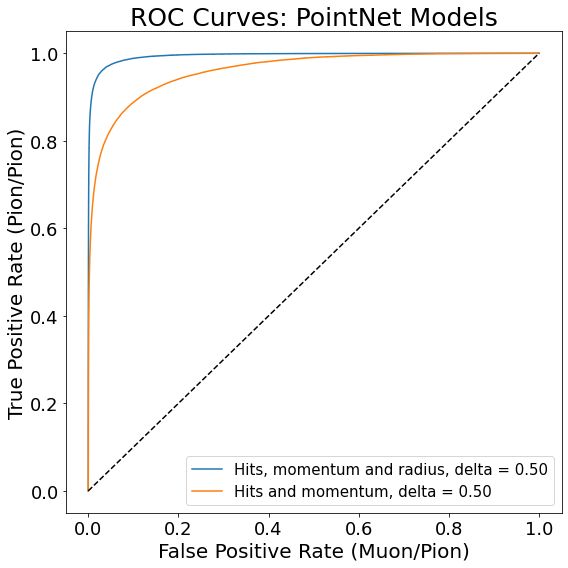

In [9]:
plot_roc_curves(
    best_pointnet_models,
    title="ROC Curves: PointNet Models",
)

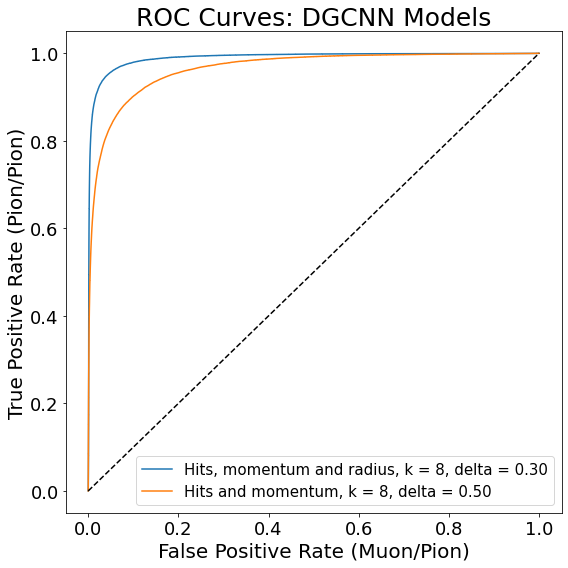

In [10]:
plot_roc_curves(
    best_dgcnn_models,
    title="ROC Curves: DGCNN Models",
)

# ROC Curves: All Models

In [11]:
results = {
    "PointNet": pointnet_path,
    "Dynamic Graph CNN": dgcnn_path,
    "XGBoost": xgboost_path
}

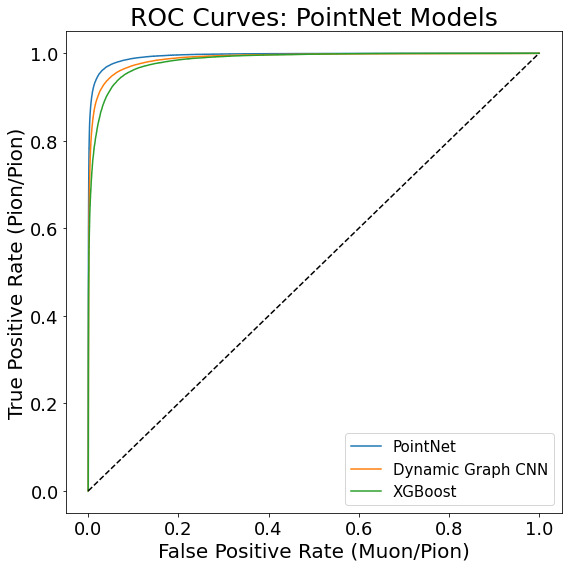

In [12]:
plot_roc_curves(
    results,
    title="ROC Curves: PointNet Models",
)

# Efficiency curves at selected operating points

## PointNet

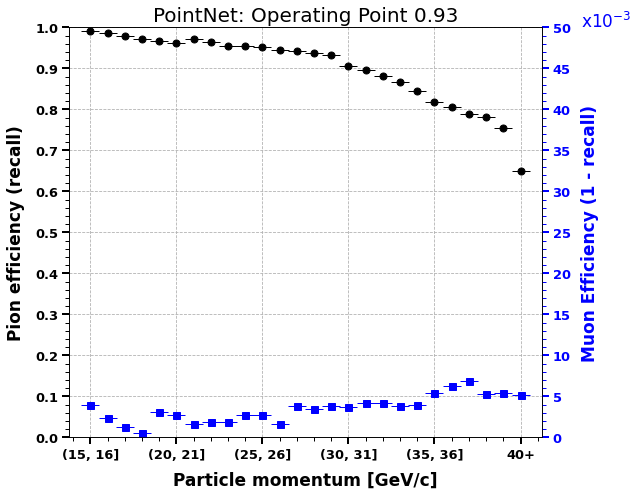

In [13]:
plot_efficiencies(
    path=pointnet_path,
    title="PointNet: Operating Point 0.93",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 50),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(5, 1),
    op_point=0.93
)

## Dynamic Graph CNN

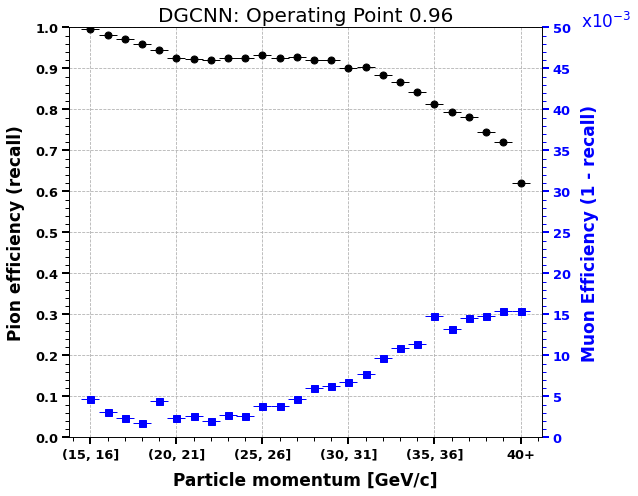

In [14]:
plot_efficiencies(
    path=dgcnn_path,
    title="DGCNN: Operating Point 0.96",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 50),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(5, 1),
    op_point=0.96
)

## XGBoost

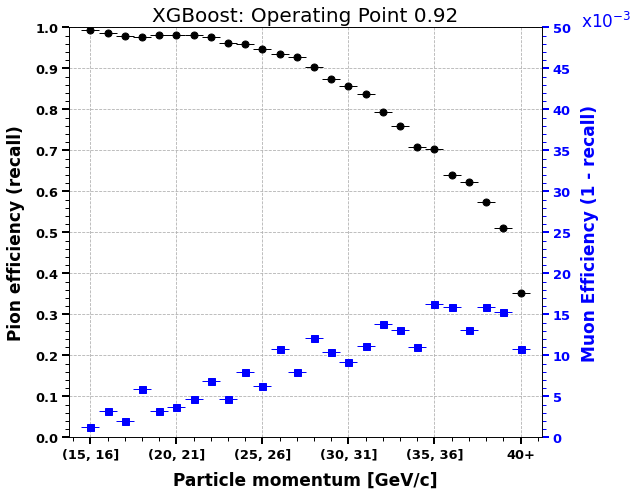

In [15]:
plot_efficiencies(
    path=xgboost_path,
    title="XGBoost: Operating Point 0.92",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 50),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(5, 1),
    op_point=0.92
)

# Efficiencies and confusion matrix as base 0.5 operating point

Note: This was not presented, but was just in the appendix in case people asked what the base operating point looked like.

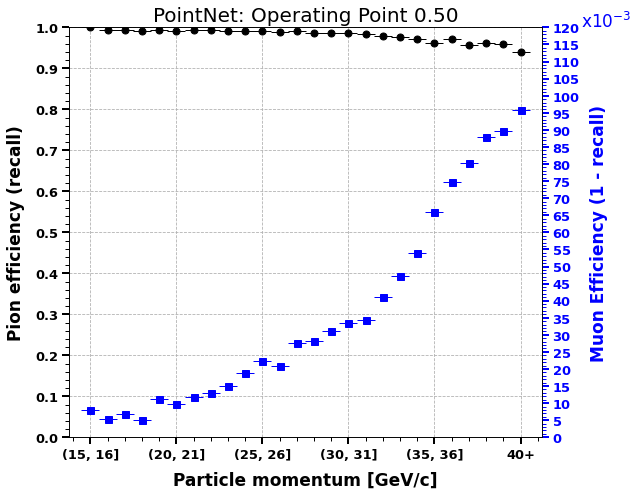

In [16]:
plot_efficiencies(
    path=pointnet_path,
    title="PointNet: Operating Point 0.50",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 120),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(5, 1),
    op_point=0.50
)

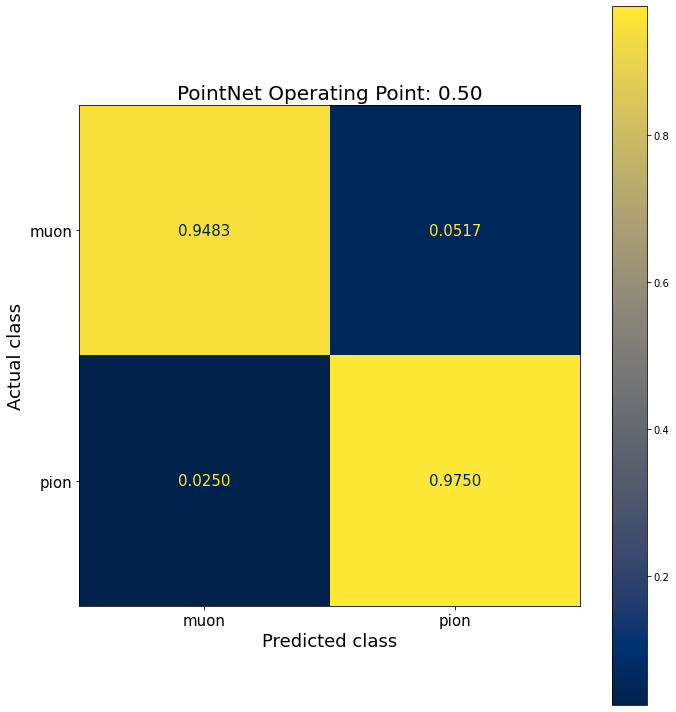

In [17]:
plot_cm(
    y_true=pointnet_results["labels"],
    y_pred=np.where(pointnet_results["probabilities"] > 0.50, 1, 0),
    title="PointNet Operating Point: 0.50"
)

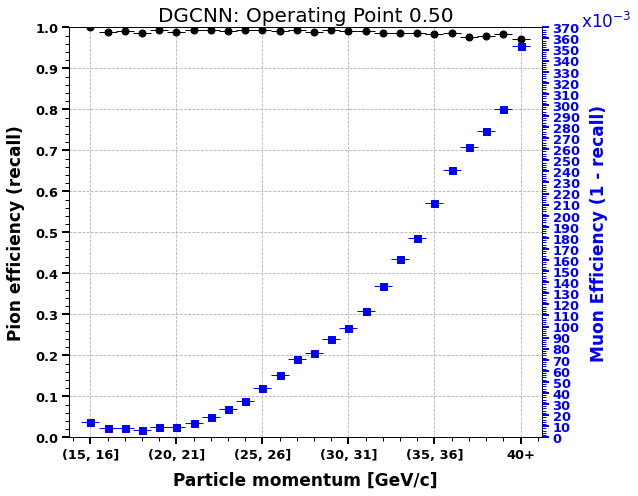

In [18]:
plot_efficiencies(
    path=dgcnn_path,
    title="DGCNN: Operating Point 0.50",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 370),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(10, 2),
    op_point=0.50
)

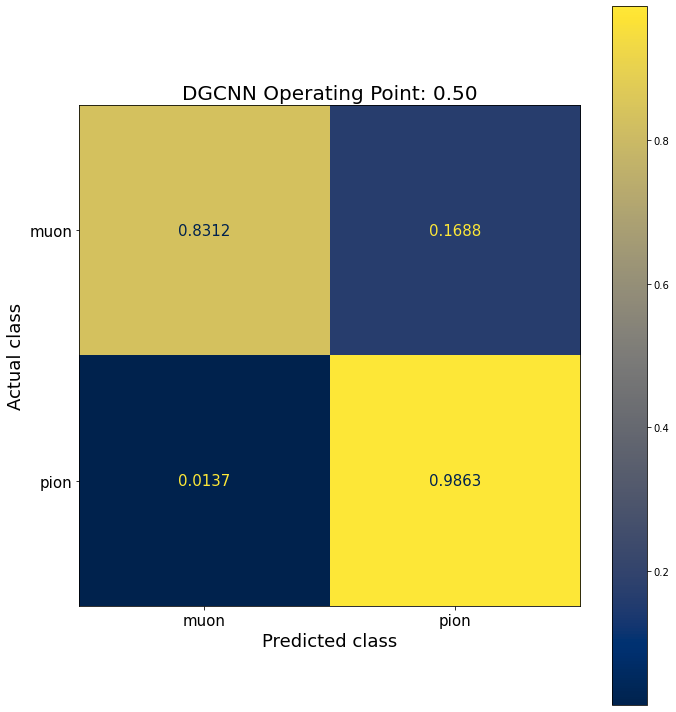

In [19]:
plot_cm(
    y_true=dgcnn_results["labels"],
    y_pred=np.where(dgcnn_results["probabilities"] > 0.50, 1, 0),
    title="DGCNN Operating Point: 0.50"
)

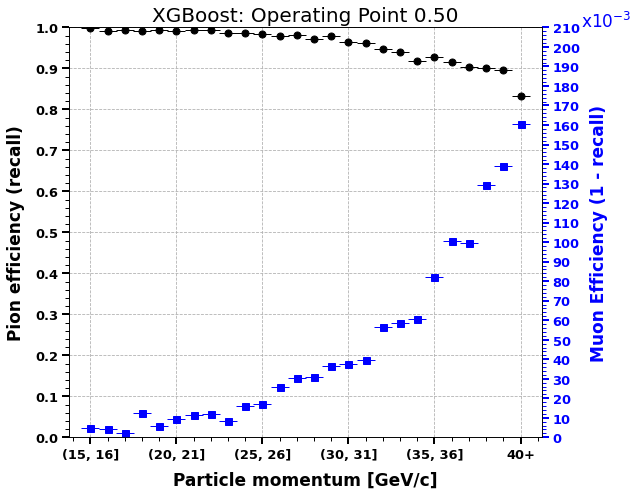

In [20]:
plot_efficiencies(
    path=xgboost_path,
    title="XGBoost: Operating Point 0.50",
    cern_scale=True,
    pion_axlims=(0, 1),
    muon_axlims=(0, 210),
    pion_axticks=(0.10, 0.02),
    muon_axticks=(10, 2),
    op_point=0.50
)

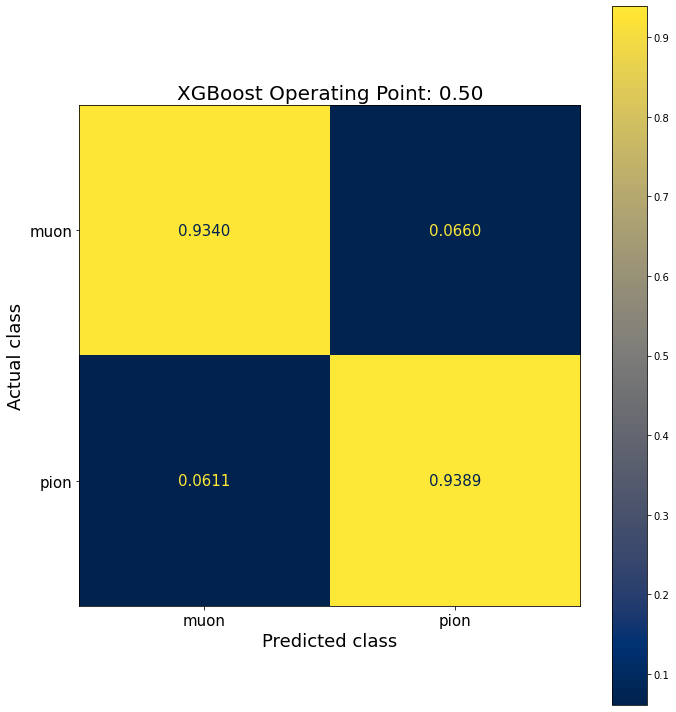

In [21]:
plot_cm(
    y_true=xgboost_results["labels"],
    y_pred=np.where(xgboost_results["probabilities"] > 0.50, 1, 0),
    title="XGBoost Operating Point: 0.50"
)